In [1]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:20630],all_data.loc[20631:]

In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC
# from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# from sklearn import cross_validation, metrics
from sklearn import  metrics
from sklearn.model_selection import cross_validate

import types
def __iter__(self): return 0

In [3]:
train_data=pd.read_table("PM_train.txt", sep=" ", header=None)
test_data=pd.read_table("PM_test.txt", sep=" ", header=None)

In [4]:
pd.set_option('display.max_columns', None)
train_data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.419,NaN,NaN


In [5]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")

train_data_contains: 20631 row and 28 columns
test_data_contains: 13096 row and 28 columns


In [6]:
print("first_3_row_of_train_data")
display(train_data.head(3))
print("first_3_row_of_test_data")
display(test_data.tail(3))

first_3_row_of_train_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN


first_3_row_of_test_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,21.61,552.48,2388.06,9155.03,1.3,47.80,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855,NaN,NaN


In [7]:
# Subtract previous row value from the current row value in a Pandas column
train_data[26]=train_data[0] - train_data[0].shift(1)
test_data[26]=test_data[0] - test_data[0].shift(1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
print("failure_point_of_train_data")
display(train_data)
print("failure_point_of_test_data")
display(test_data)

failure_point_of_train_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0.0,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0.0,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0.0,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0.0,NaN


failure_point_of_test_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.0,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.0,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.0,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


In [10]:
train_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
train_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
train_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)

test_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
test_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
test_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
print("failure_point_of_train_data")
display(train_data.head(194))
print("failure_point_of_test_data")
display(test_data.tail(199))

failure_point_of_train_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,0.0,NaN
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,0.0,NaN
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN


failure_point_of_test_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,2388.01,9067.16,1.3,47.26,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,0.0,NaN
12898,100,1,0.0014,0.0003,100.0,518.67,641.65,1591.50,1401.63,14.62,21.61,554.70,2388.05,9059.87,1.3,47.28,522.06,2388.02,8138.54,8.4067,0.03,391,2388,100.0,39.01,23.3087,1.0,NaN
12899,100,2,0.0031,0.0001,100.0,518.67,642.20,1588.99,1402.05,14.62,21.61,554.05,2387.99,9057.49,1.3,47.18,522.14,2388.07,8137.35,8.4291,0.03,393,2388,100.0,38.97,23.3510,0.0,NaN
12900,100,3,-0.0000,0.0001,100.0,518.67,642.27,1587.47,1396.74,14.62,21.61,554.85,2388.11,9052.23,1.3,47.11,522.54,2388.03,8134.63,8.4039,0.03,392,2388,100.0,39.14,23.3636,0.0,NaN
12901,100,4,0.0011,0.0001,100.0,518.67,642.07,1579.17,1401.93,14.62,21.61,554.05,2388.01,9058.66,1.3,47.26,522.34,2388.00,8139.06,8.4057,0.03,393,2388,100.0,39.04,23.3925,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


In [13]:
### print("missing_values_in_train_data")
### display(train_data.isnull().sum())
### print("missing_value_in_test_data")
### display(test_data.isnull().sum())

In [14]:
### train_data.describe()

In [15]:
### test_data.describe()

In [16]:
# df_all=concat_df(train_data,test_data)
# train_data,test_data=divide_df(df_all)

In [17]:
#Subtract values from maximum value within groups
train_data[27]=train_data.groupby('asset_id').run_time.transform('max') - train_data.run_time
train_data["failure"].fillna(0, inplace = True)   ###0.0
train_data.rename(columns={27: 'remain_cycle'}, inplace=True)

#Subtract values from maximum value within groups
test_data[27]=test_data.groupby('asset_id').run_time.transform('max') - test_data.run_time
test_data["failure"].fillna(0, inplace = True)   ###0.0
test_data.rename(columns={27: 'remain_cycle'}, inplace=True)

In [18]:
test_data.head(33)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.0,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.0,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.0,28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.0,27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.0,26
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.00,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,0.0,25
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,0.0,24
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224,0.0,23
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521,0.0,22
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820,0.0,21


In [19]:
train_data.head(194)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,0.0,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,0.0,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,0
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,286


In [20]:
train_data['coming'] = np.where(((train_data.remain_cycle < 21) & ((train_data.remain_cycle>=0))), 1, 0)
tips_summed = train_data.groupby(['coming'])['s_4'].count()
tips_summed

coming
0    18531
1     2100
Name: s_4, dtype: int64

In [21]:
test_data['coming'] = np.where(((test_data.remain_cycle < 21) & ((test_data.remain_cycle>=0))), 1, 0)
tips_summed = test_data.groupby(['coming'])['s_5'].count()
tips_summed

coming
0    10996
1     2100
Name: s_5, dtype: int64

In [22]:
print(train_data['coming'].mean())
print(test_data['coming'].mean())

0.10178857059764432
0.16035430665852168


In [23]:
df_all=concat_df(train_data,test_data)
#train_data,test_data=divide_df(df_all)

In [24]:
df_all

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3
0,1,0,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0
1,1,0,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0
2,1,0,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0
3,1,0,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0
4,1,0,0.0,187,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,642.37,38.90,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33722,100,1,0.0,4,194,518.67,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,643.24,38.65,23.1974,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,0.0049,0.0000,100.0
33723,100,1,0.0,3,195,518.67,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,643.22,38.57,23.2771,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,-0.0011,-0.0001,100.0
33724,100,1,0.0,2,196,518.67,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,643.44,38.62,23.2051,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,-0.0006,-0.0003,100.0
33725,100,1,0.0,1,197,518.67,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,643.26,38.66,23.2699,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,-0.0038,0.0001,100.0


In [25]:
import numpy as np
# Create a running mean, max, min, and median for the sensor variables

dfx=df_all
### dfx=dfx.sort_values(by=['asset_id', 'run_time'], ascending=[True, True])

dfx['setting_1_mean'] = np.where((df_all.coming == 0),(df_all['setting_1'].rolling(min_periods=1, window=21).mean()) , df_all.setting_1)
dfx['setting_2_mean'] = np.where((df_all.coming == 0),(df_all['setting_2'].rolling(min_periods=1, window=21).mean()) , df_all.setting_2)

dfx['s_2_mean'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).mean()) , df_all.s_2)
dfx['s_2_median'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).median()) , df_all.s_2)
dfx['s_2_max'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).max()) , df_all.s_2)
dfx['s_2_min'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).min()) , df_all.s_2)

dfx['s_3_mean'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).mean()) , df_all.s_3)
dfx['s_3_median'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).median()) , df_all.s_3)
dfx['s_3_max'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).max()) , df_all.s_3)
dfx['s_3_min'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).min()) , df_all.s_3)

dfx['s_4_mean'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).mean()) , df_all.s_4)
dfx['s_4_median'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).median()) , df_all.s_4)
dfx['s_4_max'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).max()) , df_all.s_4)
dfx['s_4_min'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).min()) , df_all.s_4)

dfx['s_7_mean'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).mean()) , df_all.s_7)
dfx['s_7_median'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).median()) , df_all.s_7)
dfx['s_7_max'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).max()) , df_all.s_7)
dfx['s_7_min'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).min()) , df_all.s_7)

dfx['s_8_mean'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).mean()) , df_all.s_8)
dfx['s_8_median'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).median()) , df_all.s_8)
dfx['s_8_max'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).max()) , df_all.s_8)
dfx['s_8_min'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).min()) , df_all.s_8)

dfx['s_9_mean'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).mean()) , df_all.s_9)
dfx['s_9_median'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).median()) , df_all.s_9)
dfx['s_9_max'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).max()) , df_all.s_9)
dfx['s_9_min'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).min()) , df_all.s_9)

dfx['s_11_mean'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).mean()) , df_all.s_11)
dfx['s_11_median'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).median()) , df_all.s_11)
dfx['s_11_max'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).max()) , df_all.s_11)
dfx['s_11_min'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).min()) , df_all.s_11)

dfx['s_12_mean'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).mean()) , df_all.s_12)
dfx['s_12_median'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).median()) , df_all.s_12)
dfx['s_12_max'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).max()) , df_all.s_12)
dfx['s_12_min'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).min()) , df_all.s_12)

dfx['s_13_mean'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).mean()) , df_all.s_13)
dfx['s_13_median'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).median()) , df_all.s_13)
dfx['s_13_max'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).max()) , df_all.s_13)
dfx['s_13_min'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).min()) , df_all.s_13)

dfx['s_14_mean'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).mean()) , df_all.s_14)
dfx['s_14_median'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).median()) , df_all.s_14)
dfx['s_14_max'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).max()) , df_all.s_14)
dfx['s_14_min'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).min()) , df_all.s_14)

dfx['s_15_mean'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).mean()) , df_all.s_15)
dfx['s_15_median'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).median()) , df_all.s_15)
dfx['s_15_max'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).max()) , df_all.s_15)
dfx['s_15_min'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).min()) , df_all.s_15)

dfx['s_17_mean'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).mean()) , df_all.s_17)
dfx['s_17_median'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).median()) , df_all.s_17)
dfx['s_17_max'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).max()) , df_all.s_17)
dfx['s_17_min'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).min()) , df_all.s_17)

dfx['s_20_mean'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).mean()) , df_all.s_20)
dfx['s_20_median'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).median()) , df_all.s_20)
dfx['s_20_max'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).max()) , df_all.s_20)
dfx['s_20_min'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).min()) , df_all.s_20)

dfx['s_21_mean'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).mean()) , df_all.s_21)
dfx['s_21_median'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).median()) , df_all.s_21)
dfx['s_21_max'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).max()) , df_all.s_21)
dfx['s_21_min'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).min()) , df_all.s_21)

In [26]:
# Another useful transformation is to look for sudden spikes in sensor values
# This code creates a value indicating how far the current value is from the immediate norm

dfx['setting_1_chg'] = np.where((df_all.setting_1_mean == 0),0 , df_all.setting_1/df_all.setting_1_mean)
dfx['setting_2_chg'] = np.where((df_all.setting_2_mean == 0),0 , df_all.setting_2/df_all.setting_2_mean)

dfx['s_2_chg'] = np.where((df_all.s_2_mean == 0),0 , df_all.s_2/df_all.s_2_mean)
dfx['s_3_chg'] = np.where((df_all.s_3_mean == 0),0 , df_all.s_3/df_all.s_3_mean)
dfx['s_4_chg'] = np.where((df_all.s_4_mean == 0),0 , df_all.s_4/df_all.s_4_mean)

dfx['s_7_chg'] = np.where((df_all.s_7_mean == 0),0 , df_all.s_7/df_all.s_7_mean)
dfx['s_8_chg'] = np.where((df_all.s_8_mean == 0),0 , df_all.s_8/df_all.s_8_mean)
dfx['s_9_chg'] = np.where((df_all.s_9_mean == 0),0 , df_all.s_9/df_all.s_9_mean)

dfx['s_11_chg'] = np.where((df_all.s_11_mean == 0),0 , df_all.s_11/df_all.s_11_mean)
dfx['s_12_chg'] = np.where((df_all.s_12_mean == 0),0 , df_all.s_12/df_all.s_12_mean)
dfx['s_13_chg'] = np.where((df_all.s_13_mean == 0),0 , df_all.s_13/df_all.s_13_mean)

dfx['s_14_chg'] = np.where((df_all.s_14_mean == 0),0 , df_all.s_14/df_all.s_14_mean)
dfx['s_15_chg'] = np.where((df_all.s_15_mean == 0),0 , df_all.s_15/df_all.s_15_mean)
dfx['s_17_chg'] = np.where((df_all.s_17_mean == 0),0 , df_all.s_17/df_all.s_17_mean)

dfx['s_20_chg'] = np.where((df_all.s_20_mean == 0),0 , df_all.s_20/df_all.s_20_mean)
dfx['s_21_chg'] = np.where((df_all.s_21_mean == 0),0 , df_all.s_21/df_all.s_21_mean)

df_all=dfx

In [27]:
df_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33727 entries, 0 to 33726
Data columns (total 103 columns):
 #    Column          Dtype  
---   ------          -----  
 0    asset_id        int64  
 1    coming          int64  
 2    failure         float64
 3    remain_cycle    int64  
 4    run_time        int64  
 5    s_1             float64
 6    s_10            float64
 7    s_11            float64
 8    s_12            float64
 9    s_13            float64
 10   s_14            float64
 11   s_15            float64
 12   s_16            float64
 13   s_17            int64  
 14   s_18            int64  
 15   s_19            float64
 16   s_2             float64
 17   s_20            float64
 18   s_21            float64
 19   s_3             float64
 20   s_4             float64
 21   s_5             float64
 22   s_6             float64
 23   s_7             float64
 24   s_8             float64
 25   s_9             float64
 26   setting_1       float64
 27   setting_2     

In [28]:
df_all['s_17'] = df_all.s_17.astype(float)

In [29]:
df_all['s_18'] = df_all.s_18.astype(float)

In [30]:
df_all.head(196)

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,1,0,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0,-0.000700,-0.000400,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0,0.000600,-0.000350,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,1,0,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0,-0.001033,-0.000133,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,1,0,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0,-0.000600,-0.000100,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.34

In [31]:
#df_all=concat_df(train_data,test_data)
train_data,test_data=divide_df(df_all)

In [32]:
### train_data.info(verbose=True)

In [33]:
### test_data.info(verbose=True)

In [34]:
train_data#.head(196)

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,1,0,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0,-0.000700,-0.000400,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.0600,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470,47.47,47.47,47.47,521.660,521.66,521.66,521.66,2388.020,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0,0.000600,-0.000350,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.0500,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480,47.48,47.49,47.47,521.970,521.97,522.28,521.66,2388.045,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,1,0,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0,-0.001033,-0.000133,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.0600,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410,47.47,47.49,47.27,522.120,522.28,522.42,521.66,2388.040,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,1,0,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0,-0.000600,-0.000100,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.0725,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340,47.37,47.49,47.13,522.305,522.35,522.86,521.66,2388.050,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.000000,1.000284,0.996672,0.9

In [35]:
test_data.head(33)

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
20631,1,0,0.0,30,1,518.67,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,643.02,38.86,23.3735,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,0.0023,0.0003,100.0,0.000076,-0.000014,643.438095,643.49,643.95,642.91,1599.243810,1599.81,1610.87,1585.29,1424.076667,1426.53,1433.58,1398.21,551.590476,551.53,553.90,550.68,2388.212857,2388.22,2388.29,2388.04,9065.761905,9065.94,9073.72,9050.17,48.029048,48.06,48.39,47.20,520.062381,520.01,521.72,519.30,2388.223333,2388.22,2388.28,2388.03,8139.927619,8140.49,8144.21,8125.55,8.505714,8.5036,8.5646,8.4052,395.619048,396.0,398.0,392.0,38.464762,38.44,38.86,38.14,23.111329,23.1173,23.3735,22.9333,30.187500,-21.000000,0.999350,0.991275,0.981836,1.004187,0.999928,0.998280,0.982739,1.003187,0.999919,0.998234,0.988183,0.990852,1.010275,1.011344
20632,1,0,0.0,29,2,518.67,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,641.71,39.02,23.3916,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,-0.0027,-0.0003,100.0,-0.000167,-0.000005,643.364762,643.49,643.95,641.71,1598.797143,1599.81,1610.87,1585.29,1423.161905,1426.53,1433.58,1395.42,551.714762,551.53,554.85,550.68,2388.204762,2388.22,2388.29,2388.01,9065.241905,9065.94,9073.72,9050.17,48.005714,48.06,48.39,47.20,520.145238,520.01,522.16,519.30,2388.215714,2388.22,2388.28,2388.03,8139.942857,8140.49,8144.21,8125.55,8.497548,8.5006,8.5646,8.3803,395.476190,395.0,398.0,392.0,38.488571,38.44,39.02,38.14,23.121529,23.1173,23.3916,22.9333,16.200000,63.000000,0.997428,0.993528,0.980507,1.005683,0.999918,0.998806,0.989466,1.003873,0.999935,0.999960,0.986202,0.993739,1.013807,1.011681
20633,1,0,0.0,28,3,518.67,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,642.46,39.08,23.4166,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,0.0003,0.0001,100.0,-0.000186,0.000005,643.314286,643.42,643.95,641.71,1597.970000,1598.88,1610.87,1585.29,1422.381429,1426.53,1433.58,1395.42,551.840476,551.61,554.85,550.68,2388.198095,2388.22,2388.29,2388.01,9064.924762,9065.94,9073.72,9050.17,47.993810,48.06,48.39,47.20,520.236667,520.01,522.16,519.30,2388.206667,2388.22,2388.28,2388.03,8139.430000,8139.94,8144.21,8125.55,8.495576,8.5006,8.5646,8.3803,395.333333,395.0,398.0,392.0,38.520476,38.47,39.08,38.14,23.135229,23.1173,23.4166,22.9333,-1.615385,21.000000,0.998672,0.993097,0.985207,1.004113,0.999938,0.999121,0.989711,1.003332,0.999926,0.998854,0.993941,0.994098,1.014525,1.012162
20634,1,0,0.0,27,4,518.67,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,642.44,39.00,23.3737,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,0.0042,0.0000,100.0,0.000067,0.000014,643.271429,643.42,643.95,641.71,1597.470952,1598.88,1610.87,1584.12,1421.388571,1426.04,1433.58,1395.42,551.947143,551.61,554.85,550.68,2388.190000,2388.22,2388.29,2388.01,9063.934762,9065.90,9073.72,9045.29,47.959524,48.06,48.39,47.20,520.271905,520.01,522.16,519.30,2388.198095,2388.22,2388.28,2388.03,8138.891429,8139.78,8143.56,8125.55,8.490390,8.4989,8.5646,8.3803,395.142857,395.0,398.0,391.0,38.544762,38.47,39.08,38.14,23.149648,23.1218,23.4166,22.9333,63.000000,0.000000,0.998

In [36]:
training_features=train_data[['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                                  #'setting_1','setting_2', 
                                 's_2_mean','s_2_median','s_2_max','s_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                                 's_4_mean','s_4_median','s_4_max','s_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                                 's_8_mean','s_8_median','s_8_max','s_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                                 's_11_mean','s_11_median','s_11_max','s_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                                 's_13_mean','s_13_median','s_13_max','s_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                                 's_15_mean','s_15_median','s_15_max','s_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                                 's_20_mean','s_20_median','s_20_max','s_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                                 # 'setting_1_chg','setting_2_chg',
                                 's_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                                 's_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg']]

target_feature=train_data[['coming']]

In [37]:
### training_features=train_data[['setting_1','setting_2','s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21']]
### 
### target_feature=train_data[['coming']]

In [38]:
### training_features.info(verbose=True)

In [39]:
X = training_features

In [40]:
X

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.0600,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470,47.47,47.47,47.47,521.660,521.66,521.66,521.66,2388.020,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.0500,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480,47.48,47.49,47.47,521.970,521.97,522.28,521.66,2388.045,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.0600,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410,47.47,47.49,47.27,522.120,522.28,522.42,521.66,2388.040,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.0725,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340,47.37,47.49,47.13,522.305,522.35,522.86,521.66,2388.050,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.0700,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328,47.28,47.49,47.13,522.282,522.28,522.86,521.66,2388.048,2388.040,2388.08,2388.02,8134.194000,8133.800,8138.62,8131.49,8.413340,8.41950,8.4318,8.3682,391.800000,392.0,393.0,390.0,38.958000,38.950,39

In [41]:
target_feature.dtypes

coming    int64
dtype: object

In [42]:
y = target_feature

#y=target_feature.astype(int)

In [43]:
y

,coming
0,0
1,0
2,0
3,0
4,0
...,...
20626,1
20627,1
20628,1
20629,1


In [44]:
#train_data=train_data.drop(columns=['index'])

#train_data=train_data.sort_values(by=['asset_id', 'run_time'], ascending=[True, True])
#train_data.reset_index(inplace=True)

In [45]:
df_train_test=test_data.drop(columns=['run_time','setting_1','setting_2','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure','remain_cycle','setting_1_mean','setting_2_mean'])

    
df_train_test=test_data[['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21','coming']]

    
X_test=test_data[['s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                               
                               's_2_mean','s_2_median','s_2_max','s_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                               's_4_mean','s_4_median','s_4_max','s_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                               's_8_mean','s_8_median','s_8_max','s_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                               's_11_mean','s_11_median','s_11_max','s_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                               's_13_mean','s_13_median','s_13_max','s_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                               's_15_mean','s_15_median','s_15_max','s_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                               's_20_mean','s_20_median','s_20_max','s_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                               
                               # 'setting_1_chg','setting_2_chg',
                               's_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                               's_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg']]

y_test=test_data[['coming']]

In [46]:
### X_test=test_data[['setting_1','setting_2','s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21']]
### 
### y_test=test_data[['coming']]

In [47]:
df_train_test=test_data.drop(columns=['run_time'])

In [48]:
df_train_test

,asset_id,coming,failure,remain_cycle,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
20631,1,0,0.0,30,518.67,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,643.02,38.86,23.3735,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,0.0023,0.0003,100.0,0.000076,-0.000014,643.438095,643.49,643.95,642.91,1599.243810,1599.81,1610.87,1585.29,1424.076667,1426.53,1433.58,1398.21,551.590476,551.53,553.90,550.68,2388.212857,2388.22,2388.29,2388.04,9065.761905,9065.94,9073.72,9050.17,48.029048,48.06,48.39,47.20,520.062381,520.01,521.72,519.30,2388.223333,2388.22,2388.28,2388.03,8139.927619,8140.49,8144.21,8125.55,8.505714,8.5036,8.5646,8.4052,395.619048,396.0,398.0,392.0,38.464762,38.44,38.86,38.14,23.111329,23.1173,23.3735,22.9333,30.187500,-21.0,0.999350,0.991275,0.981836,1.004187,0.999928,0.998280,0.982739,1.003187,0.999919,0.998234,0.988183,0.990852,1.010275,1.011344
20632,1,0,0.0,29,518.67,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,641.71,39.02,23.3916,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,-0.0027,-0.0003,100.0,-0.000167,-0.000005,643.364762,643.49,643.95,641.71,1598.797143,1599.81,1610.87,1585.29,1423.161905,1426.53,1433.58,1395.42,551.714762,551.53,554.85,550.68,2388.204762,2388.22,2388.29,2388.01,9065.241905,9065.94,9073.72,9050.17,48.005714,48.06,48.39,47.20,520.145238,520.01,522.16,519.30,2388.215714,2388.22,2388.28,2388.03,8139.942857,8140.49,8144.21,8125.55,8.497548,8.5006,8.5646,8.3803,395.476190,395.0,398.0,392.0,38.488571,38.44,39.02,38.14,23.121529,23.1173,23.3916,22.9333,16.200000,63.0,0.997428,0.993528,0.980507,1.005683,0.999918,0.998806,0.989466,1.003873,0.999935,0.999960,0.986202,0.993739,1.013807,1.011681
20633,1,0,0.0,28,518.67,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,642.46,39.08,23.4166,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,0.0003,0.0001,100.0,-0.000186,0.000005,643.314286,643.42,643.95,641.71,1597.970000,1598.88,1610.87,1585.29,1422.381429,1426.53,1433.58,1395.42,551.840476,551.61,554.85,550.68,2388.198095,2388.22,2388.29,2388.01,9064.924762,9065.94,9073.72,9050.17,47.993810,48.06,48.39,47.20,520.236667,520.01,522.16,519.30,2388.206667,2388.22,2388.28,2388.03,8139.430000,8139.94,8144.21,8125.55,8.495576,8.5006,8.5646,8.3803,395.333333,395.0,398.0,392.0,38.520476,38.47,39.08,38.14,23.135229,23.1173,23.4166,22.9333,-1.615385,21.0,0.998672,0.993097,0.985207,1.004113,0.999938,0.999121,0.989711,1.003332,0.999926,0.998854,0.993941,0.994098,1.014525,1.012162
20634,1,0,0.0,27,518.67,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,642.44,39.00,23.3737,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,0.0042,0.0000,100.0,0.000067,0.000014,643.271429,643.42,643.95,641.71,1597.470952,1598.88,1610.87,1584.12,1421.388571,1426.04,1433.58,1395.42,551.947143,551.61,554.85,550.68,2388.190000,2388.22,2388.29,2388.01,9063.934762,9065.90,9073.72,9045.29,47.959524,48.06,48.39,47.20,520.271905,520.01,522.16,519.30,2388.198095,2388.22,2388.28,2388.03,8138.891429,8139.78,8143.56,8125.55,8.490390,8.4989,8.5646,8.3803,395.142857,395.0,398.0,391.0,38.544762,38.47,39.08,38.14,23.149648,23.1218,23.4166,22.9333,63.000000,0.0,0.998707,0.991642,0.989469,1.003846,0.9999

In [49]:
###################################################################################

y_test['coming'].astype(int)
sum(y_test['coming'])

2100

In [50]:
X_test

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
20631,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392.0,38.86,23.3735,643.438095,643.49,643.95,642.91,1599.243810,1599.81,1610.87,1585.29,1424.076667,1426.53,1433.58,1398.21,551.590476,551.53,553.90,550.68,2388.212857,2388.22,2388.29,2388.04,9065.761905,9065.94,9073.72,9050.17,48.029048,48.06,48.39,47.20,520.062381,520.01,521.72,519.30,2388.223333,2388.22,2388.28,2388.03,8139.927619,8140.49,8144.21,8125.55,8.505714,8.5036,8.5646,8.4052,395.619048,396.0,398.0,392.0,38.464762,38.44,38.86,38.14,23.111329,23.1173,23.3735,22.9333,0.999350,0.991275,0.981836,1.004187,0.999928,0.998280,0.982739,1.003187,0.999919,0.998234,0.988183,0.990852,1.010275,1.011344
20632,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393.0,39.02,23.3916,643.364762,643.49,643.95,641.71,1598.797143,1599.81,1610.87,1585.29,1423.161905,1426.53,1433.58,1395.42,551.714762,551.53,554.85,550.68,2388.204762,2388.22,2388.29,2388.01,9065.241905,9065.94,9073.72,9050.17,48.005714,48.06,48.39,47.20,520.145238,520.01,522.16,519.30,2388.215714,2388.22,2388.28,2388.03,8139.942857,8140.49,8144.21,8125.55,8.497548,8.5006,8.5646,8.3803,395.476190,395.0,398.0,392.0,38.488571,38.44,39.02,38.14,23.121529,23.1173,23.3916,22.9333,0.997428,0.993528,0.980507,1.005683,0.999918,0.998806,0.989466,1.003873,0.999935,0.999960,0.986202,0.993739,1.013807,1.011681
20633,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393.0,39.08,23.4166,643.314286,643.42,643.95,641.71,1597.970000,1598.88,1610.87,1585.29,1422.381429,1426.53,1433.58,1395.42,551.840476,551.61,554.85,550.68,2388.198095,2388.22,2388.29,2388.01,9064.924762,9065.94,9073.72,9050.17,47.993810,48.06,48.39,47.20,520.236667,520.01,522.16,519.30,2388.206667,2388.22,2388.28,2388.03,8139.430000,8139.94,8144.21,8125.55,8.495576,8.5006,8.5646,8.3803,395.333333,395.0,398.0,392.0,38.520476,38.47,39.08,38.14,23.135229,23.1173,23.4166,22.9333,0.998672,0.993097,0.985207,1.004113,0.999938,0.999121,0.989711,1.003332,0.999926,0.998854,0.993941,0.994098,1.014525,1.012162
20634,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391.0,39.00,23.3737,643.271429,643.42,643.95,641.71,1597.470952,1598.88,1610.87,1584.12,1421.388571,1426.04,1433.58,1395.42,551.947143,551.61,554.85,550.68,2388.190000,2388.22,2388.29,2388.01,9063.934762,9065.90,9073.72,9045.29,47.959524,48.06,48.39,47.20,520.271905,520.01,522.16,519.30,2388.198095,2388.22,2388.28,2388.03,8138.891429,8139.78,8143.56,8125.55,8.490390,8.4989,8.5646,8.3803,395.142857,395.0,398.0,391.0,38.544762,38.47,39.08,38.14,23.149648,23.1218,23.4166,22.9333,0.998707,0.991642,0.989469,1.003846,0.999933,0.997943,0.985831,1.002130,0.999938,0.999264,0.988376,0.989516,1.011811,1.009678
20635,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390.0,38.99,23.4130,643.252381,643.42,643.95,641.71,1596.914286,1597.98,1610.87,1584.12,1420.485238,1426.04,1433.58,1395.42,552.063333,551.61,554.85,550.68,2388.178571,2388.21,2388.29,2388.01,9063.001905,9065.90,9073.72,9044.55,47.927619,48.06,48.39,47.20,520.371905,520.01,522.16,519.30,2388.190000,2388.22,2388.28,2388.03,8138.284762,8139.67,8143.56,8125.55,8.485829,8.4956,8.5646,8.3803,394.857143,395.0,398.

In [51]:
X_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 20631 to 33726
Data columns (total 84 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   s_2          13096 non-null  float64
 1   s_3          13096 non-null  float64
 2   s_4          13096 non-null  float64
 3   s_7          13096 non-null  float64
 4   s_8          13096 non-null  float64
 5   s_9          13096 non-null  float64
 6   s_11         13096 non-null  float64
 7   s_12         13096 non-null  float64
 8   s_13         13096 non-null  float64
 9   s_14         13096 non-null  float64
 10  s_15         13096 non-null  float64
 11  s_17         13096 non-null  float64
 12  s_20         13096 non-null  float64
 13  s_21         13096 non-null  float64
 14  s_2_mean     13096 non-null  float64
 15  s_2_median   13096 non-null  float64
 16  s_2_max      13096 non-null  float64
 17  s_2_min      13096 non-null  float64
 18  s_3_mean     13096 non-null  float64
 19  

In [52]:
df_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 20631 to 33726
Data columns (total 102 columns):
 #    Column          Dtype  
---   ------          -----  
 0    asset_id        int64  
 1    coming          int64  
 2    failure         float64
 3    remain_cycle    int64  
 4    s_1             float64
 5    s_10            float64
 6    s_11            float64
 7    s_12            float64
 8    s_13            float64
 9    s_14            float64
 10   s_15            float64
 11   s_16            float64
 12   s_17            float64
 13   s_18            float64
 14   s_19            float64
 15   s_2             float64
 16   s_20            float64
 17   s_21            float64
 18   s_3             float64
 19   s_4             float64
 20   s_5             float64
 21   s_6             float64
 22   s_7             float64
 23   s_8             float64
 24   s_9             float64
 25   setting_1       float64
 26   setting_2       float64
 27   setting_3 

In [53]:
pd.set_option('display.max_columns', None)
df_train_test.head(194)

,asset_id,coming,failure,remain_cycle,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
20631,1,0,0.0,30,518.67,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,643.02,38.86,23.3735,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,0.0023,0.0003,100.0,0.000076,-0.000014,643.438095,643.49,643.95,642.91,1599.243810,1599.81,1610.87,1585.29,1424.076667,1426.53,1433.58,1398.21,551.590476,551.53,553.90,550.68,2388.212857,2388.22,2388.29,2388.04,9065.761905,9065.94,9073.72,9050.17,48.029048,48.06,48.39,47.20,520.062381,520.01,521.72,519.30,2388.223333,2388.22,2388.28,2388.03,8139.927619,8140.49,8144.21,8125.55,8.505714,8.5036,8.5646,8.4052,395.619048,396.0,398.0,392.0,38.464762,38.44,38.86,38.14,23.111329,23.1173,23.3735,22.9333,30.187500,-21.0,0.999350,0.991275,0.981836,1.004187,0.999928,0.998280,0.982739,1.003187,0.999919,0.998234,0.988183,0.990852,1.010275,1.011344
20632,1,0,0.0,29,518.67,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,641.71,39.02,23.3916,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,-0.0027,-0.0003,100.0,-0.000167,-0.000005,643.364762,643.49,643.95,641.71,1598.797143,1599.81,1610.87,1585.29,1423.161905,1426.53,1433.58,1395.42,551.714762,551.53,554.85,550.68,2388.204762,2388.22,2388.29,2388.01,9065.241905,9065.94,9073.72,9050.17,48.005714,48.06,48.39,47.20,520.145238,520.01,522.16,519.30,2388.215714,2388.22,2388.28,2388.03,8139.942857,8140.49,8144.21,8125.55,8.497548,8.5006,8.5646,8.3803,395.476190,395.0,398.0,392.0,38.488571,38.44,39.02,38.14,23.121529,23.1173,23.3916,22.9333,16.200000,63.0,0.997428,0.993528,0.980507,1.005683,0.999918,0.998806,0.989466,1.003873,0.999935,0.999960,0.986202,0.993739,1.013807,1.011681
20633,1,0,0.0,28,518.67,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,642.46,39.08,23.4166,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,0.0003,0.0001,100.0,-0.000186,0.000005,643.314286,643.42,643.95,641.71,1597.970000,1598.88,1610.87,1585.29,1422.381429,1426.53,1433.58,1395.42,551.840476,551.61,554.85,550.68,2388.198095,2388.22,2388.29,2388.01,9064.924762,9065.94,9073.72,9050.17,47.993810,48.06,48.39,47.20,520.236667,520.01,522.16,519.30,2388.206667,2388.22,2388.28,2388.03,8139.430000,8139.94,8144.21,8125.55,8.495576,8.5006,8.5646,8.3803,395.333333,395.0,398.0,392.0,38.520476,38.47,39.08,38.14,23.135229,23.1173,23.4166,22.9333,-1.615385,21.0,0.998672,0.993097,0.985207,1.004113,0.999938,0.999121,0.989711,1.003332,0.999926,0.998854,0.993941,0.994098,1.014525,1.012162
20634,1,0,0.0,27,518.67,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,642.44,39.00,23.3737,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,0.0042,0.0000,100.0,0.000067,0.000014,643.271429,643.42,643.95,641.71,1597.470952,1598.88,1610.87,1584.12,1421.388571,1426.04,1433.58,1395.42,551.947143,551.61,554.85,550.68,2388.190000,2388.22,2388.29,2388.01,9063.934762,9065.90,9073.72,9045.29,47.959524,48.06,48.39,47.20,520.271905,520.01,522.16,519.30,2388.198095,2388.22,2388.28,2388.03,8138.891429,8139.78,8143.56,8125.55,8.490390,8.4989,8.5646,8.3803,395.142857,395.0,398.0,391.0,38.544762,38.47,39.08,38.14,23.149648,23.1218,23.4166,22.9333,63.000000,0.0,0.998707,0.991642,0.989469,1.003846,0.9999

In [54]:
#df_all=df_all.drop(columns=['remain_cycle','run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure'])

In [55]:
#df_train_test['asset_id']=df_train_test.asset_id.astype(float)
#df_train_test['s_17']=df_train_test.s_17.astype(float)

In [56]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 84 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   s_2          20631 non-null  float64
 1   s_3          20631 non-null  float64
 2   s_4          20631 non-null  float64
 3   s_7          20631 non-null  float64
 4   s_8          20631 non-null  float64
 5   s_9          20631 non-null  float64
 6   s_11         20631 non-null  float64
 7   s_12         20631 non-null  float64
 8   s_13         20631 non-null  float64
 9   s_14         20631 non-null  float64
 10  s_15         20631 non-null  float64
 11  s_17         20631 non-null  float64
 12  s_20         20631 non-null  float64
 13  s_21         20631 non-null  float64
 14  s_2_mean     20631 non-null  float64
 15  s_2_median   20631 non-null  float64
 16  s_2_max      20631 non-null  float64
 17  s_2_min      20631 non-null  float64
 18  s_3_mean     20631 non-null  float64
 19  s_3_

In [57]:
sm = SMOTE()
#smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

X_res, y_res = sm.fit_resample(X,y) #.values.ravel()

In [58]:
X_res.head(194)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328000,47.28,47.49,47.13,522.282000,522.28,522.86,521.66,2388.048000,2388.040,2388.08,2388.02,8134.194000,8133.800,8138.62,8131.49,8.413340,8.41950,8.4318,

In [59]:
y_res.head()

,coming
0,0
1,0
2,0
3,0
4,0


In [60]:
# merge the dependent and independent variables post SMOTE into dataframe
# df_balanced=pd.concat([df_y,df_X],axis=1)

df_balanced=pd.concat([X_res,y_res],axis=1)

df_balanced.head(194)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg,coming
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098,0
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803,0
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304,0
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328000,47.28,47.49,47.13,522.282000,522.28,522.86,521.66,2388.048000,2388.040,2388.08,2388.02,8134.194000,8133.800,8138.62,8131.49,8.413340,

In [61]:
#df_balanced=df_balanced.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19'])

In [62]:
####################################################################################
features = [f for f in X.columns if f not in ['coming']]#,'setting_1','setting_2','setting_1_chg','setting_2_chg']]

dependent=pd.DataFrame(df_balanced['coming'])
independent=df_balanced.drop(columns=['coming'])#

#make sure everything is numeric for simplicity
independent = independent.apply(pd.to_numeric) 
df_balanced = df_balanced.apply(pd.to_numeric)

In [63]:
independent.head(194)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328000,47.28,47.49,47.13,522.282000,522.28,522.86,521.66,2388.048000,2388.040,2388.08,2388.02,8134.194000,8133.800,8138.62,8131.49,8.413340,8.41950,8.4318,

In [64]:
independent

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.660000,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,641.820000,641.820000,641.820000,641.820000,1589.700000,1589.700000,1589.700000,1589.700000,1400.600000,1400.600000,1400.600000,1400.600000,554.360000,554.360000,554.360000,554.360000,2388.060000,2388.060000,2388.060000,2388.060000,9046.190000,9046.190000,9046.190000,9046.190000,47.470000,47.470000,47.470000,47.470000,521.660000,521.660000,521.660000,521.660000,2388.020000,2388.020000,2388.020000,2388.020000,8138.620000,8138.620000,8138.620000,8138.620000,8.419500,8.419500,8.419500,8.419500,392.000000,392.000000,392.000000,392.000000,39.060000,39.060000,39.060000,39.060000,23.419000,23.419000,23.419000,23.419000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.150000,1591.820000,1403.140000,553.750000,2388.040000,9044.070000,47.490000,522.280000,2388.070000,8131.490000,8.431800,392.000000,39.000000,23.423600,641.985000,641.985000,642.150000,641.820000,1590.760000,1590.760000,1591.820000,1589.700000,1401.870000,1401.870000,1403.140000,1400.600000,554.055000,554.055000,554.360000,553.750000,2388.050000,2388.050000,2388.060000,2388.040000,9045.130000,9045.130000,9046.190000,9044.070000,47.480000,47.480000,47.490000,47.470000,521.970000,521.970000,522.280000,521.660000,2388.045000,2388.045000,2388.070000,2388.020000,8135.055000,8135.055000,8138.620000,8131.490000,8.425650,8.425650,8.431800,8.419500,392.000000,392.000000,392.000000,392.000000,39.030000,39.030000,39.060000,39.000000,23.421300,23.421300,23.423600,23.419000,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.350000,1587.990000,1404.200000,554.260000,2388.080000,9052.940000,47.270000,522.420000,2388.030000,8133.230000,8.417800,390.000000,38.950000,23.344200,642.106667,642.150000,642.350000,641.820000,1589.836667,1589.700000,1591.820000,1587.990000,1402.646667,1403.140000,1404.200000,1400.600000,554.123333,554.260000,554.360000,553.750000,2388.060000,2388.060000,2388.080000,2388.040000,9047.733333,9046.190000,9052.940000,9044.070000,47.410000,47.470000,47.490000,47.270000,522.120000,522.280000,522.420000,521.660000,2388.040000,2388.030000,2388.070000,2388.020000,8134.446667,8133.230000,8138.620000,8131.490000,8.423033,8.419500,8.431800,8.417800,391.333333,392.000000,392.000000,390.000000,39.003333,39.000000,39.060000,38.950000,23.395600,23.419000,23.423600,23.344200,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.350000,1582.790000,1401.870000,554.450000,2388.110000,9049.480000,47.130000,522.860000,2388.080000,8133.830000,8.368200,392.000000,38.880000,23.373900,642.167500,642.250000,642.350000,641.820000,1588.075000,1588.845000,1591.820000,1582.790000,1402.452500,1402.505000,1404.200000,1400.600000,554.205000,554.310000,554.450000,553.750000,2388.072500,2388.070000,2388.110000,2388.040000,9048.170000,9047.835000,9052.940000,9044.070000,47.340000,47.370000,47.490000,47.130000,522.305000,522.350000,522.860000,521.660000,2388.050000,2388.050000,2388.080000,2388.020000,8

In [65]:
# dependent.head(194)

In [66]:
# dependent

In [67]:
training_features.head(194)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328000,47.28,47.49,47.13,522.282000,522.28,522.86,521.66,2388.048000,2388.040,2388.08,2388.02,8134.194000,8133.800,8138.62,8131.49,8.413340,8.41950,8.4318,

In [68]:
# features

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,   cv_folds=3,    early_stopping_rounds=50):  # 50
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[predictors].values, target['coming'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))


In [71]:
import matplotlib.pylab as plt
%matplotlib inline

def model_fit(alg, train, target, predictors,    early_stopping_rounds=100):
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))
    

In [72]:
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 
 use_label_encoder=False,
 verbosity= 0 ,
 
 scale_pos_weight=1,
 seed=27)

In [73]:
xgb00 = XGBClassifier(
 objective= 'binary:logistic',
 learning_rate = 0.1, 
 n_estimators = 20,
 
 use_label_encoder=False,
 verbosity= 0 )

In [74]:
from sklearn.model_selection import GridSearchCV

### param_test1 = {
###  'max_depth':range(10,15,2),
###  'min_child_weight':range(1,4,2)
### }
### gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.05, n_estimators=200, max_depth=16, min_child_weight=1, gamma=0, 
###                                     subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', scale_pos_weight=1, seed=27), 
###                         param_grid = param_test1, scoring = 'roc_auc', n_jobs = 4, cv = 5)       ###### iid=False, 
### 
### gsearch1.fit(independent[features],dependent)
### #gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
### 
### #gsearch1.grid_scores_, 
### gsearch1.best_params_, gsearch1.best_score_
### 
### #gsearch1.cv_results_['params'][gsearch1.best_index_]

[0]	train-auc:0.99999+0.00002	test-auc:0.99984+0.00007
[1]	train-auc:1.00000+0.00000	test-auc:0.99986+0.00010
[2]	train-auc:1.00000+0.00000	test-auc:0.99986+0.00010
[3]	train-auc:1.00000+0.00000	test-auc:0.99986+0.00010
[4]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[5]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[6]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[7]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[8]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[9]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[10]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[11]	train-auc:1.00000+0.00000	test-auc:0.99992+0.00012
[12]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[13]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[14]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[15]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[16]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[17]	train-auc:1.00000+0.00000	test-auc:1.00000+0.00000
[1

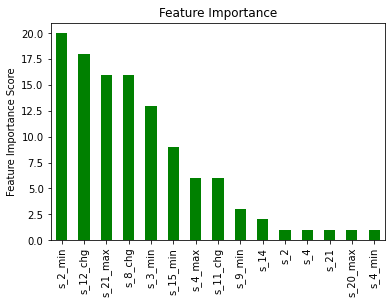

In [75]:
evaluate_model(xgb00, independent, dependent, features)

In [76]:
#   from sklearn.model_selection import GridSearchCV
#   
#   # updating our default model with the optimal number of estimators
#   xgb01 = XGBClassifier(
#    objective = 'binary:logistic',
#    learning_rate =0.1,
#    n_estimators=20,
#    
#    use_label_encoder=False,
#    verbosity= 0)
#   
#   # array of values for max_depth and min_child_weight parameters
#   param_test1 = {'max_depth':range(3,7,1),'min_child_weight':range(1,5,1)}
#   
#   # grid search with cross-validation using the updated model and parameter value array 
#   gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='roc_auc', cv=5)    ## iid=False,
#   gsearch1.fit(independent[features],dependent['coming'])
#   gsearch1.cv_results_['params'], gsearch1.best_params_, gsearch1.best_score_



# 
# 
# Here Grid Search works badly, my guessing is that the train data and test data was differed so widely 
# and if we don't use self created features, the model gives only 70% acc, 

In [77]:
#   model_fit(xgb01, independent, dependent, features)

In [78]:
#####################################################################################################

xgb_final1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,  # 500 ?? TRY try 
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 #nthread=4,
 
 use_label_encoder=False,
 verbosity= 0 ,
 
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, train, predictors)


Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


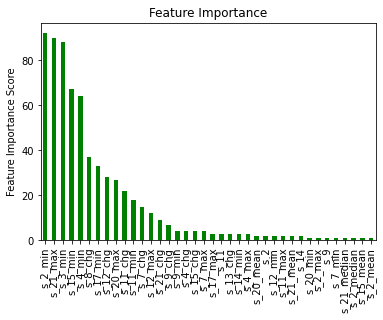

In [79]:
model_fit(xgb_final1, independent, dependent, features) 

In [80]:
test_features = [x for x in X_test.columns if x not in ['coming']] #id

#Predict test set:
test_predictions = xgb_final1.predict(X_test[test_features])
test_predprob = xgb_final1.predict_proba(X_test[test_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test['coming'].values, test_predprob))

Accuracy : 0.8988
AUC Score (Test): 0.932025


In [81]:
# df_testing['P_FAIL'].head(30)

In [82]:
# test_features

In [83]:
# X_test

In [84]:
# y_test

In [85]:
#################################################################################################

df_testing=df_train_test.copy() 

In [86]:
# df_testing['P_FAIL'].head(30)

In [87]:
df_testing['P_FAIL'] = xgb_final1.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL < .000075)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['coming'], df_testing['P_FAIL']))

Accuracy : 0.9678
AUC Score (Test): 0.932025


In [88]:
df_testing['P_FAIL'].head(30)

20631    0.001771
20632    0.000069
20633    0.000067
20634    0.000067
20635    0.000067
20636    0.000067
20637    0.000067
20638    0.000067
20639    0.000067
20640    0.000067
20641    0.000067
20642    0.000067
20643    0.000069
20644    0.000067
20645    0.000067
20646    0.000067
20647    0.001804
20648    0.000067
20649    0.000067
20650    0.000067
20651    0.000076
20652    0.000270
20653    0.000067
20654    0.013169
20655    0.000067
20656    0.000067
20657    0.000074
20658    0.013635
20659    0.000067
20660    0.000158
Name: P_FAIL, dtype: float32

In [89]:
Y_FAIL = df_testing['Y_FAIL']

In [90]:
# X_test

print(pd.crosstab(df_testing.Y_FAIL, df_testing.coming, dropna=False))

coming      0     1
Y_FAIL             
0       10956   382
1          40  1718


In [91]:
df_testing['P_FAIL'].head(30)

20631    0.001771
20632    0.000069
20633    0.000067
20634    0.000067
20635    0.000067
20636    0.000067
20637    0.000067
20638    0.000067
20639    0.000067
20640    0.000067
20641    0.000067
20642    0.000067
20643    0.000069
20644    0.000067
20645    0.000067
20646    0.000067
20647    0.001804
20648    0.000067
20649    0.000067
20650    0.000067
20651    0.000076
20652    0.000270
20653    0.000067
20654    0.013169
20655    0.000067
20656    0.000067
20657    0.000074
20658    0.013635
20659    0.000067
20660    0.000158
Name: P_FAIL, dtype: float32

In [92]:
df_testing['Y_FAIL']

20631    1
20632    0
20633    0
20634    0
20635    0
        ..
33722    1
33723    1
33724    1
33725    1
33726    1
Name: Y_FAIL, Length: 13096, dtype: int64

In [93]:
sum(df_testing['Y_FAIL'])

1758

In [94]:
####
output=pd.DataFrame({'asset_id':test_data.asset_id,
                     #'run_time':test_data.run_time,
                     #'P_FAIL':df_testing['P_FAIL'],
                     #'real':df_testing['coming'],
                     'coming':df_testing['Y_FAIL']})

#output['coming']=output['coming']#.astype(int)
output.to_csv('PaperCO0033.csv',index=False)